In [18]:
import sys
try:
    from Optimizer import minimize
    from evaluate import *
except:
    from Implementation.Optimizer import minimize
    from Implementation.evaluate import *

try:
    sys.path.append('../AutoDiff')
    from variables import Variable
except:
    from AutoDiff.variables import Variable

    
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## demo cases

In [19]:
f1=lambda x, y : 100*(y-x**2)**2 + (1-x)**2

In [20]:
v0_list = [[-1,1], [0,1], [2,1]]

In [21]:
models=['Conjugate Gradient','Steepest Descend','BFGS','Gradient Descend']

In [22]:
res={}
for model in models:
    res[model]=[minimize(f1,v0,method=model,max_iter=100000) for v0 in v0_list]

C:\Users\Lenovo\Desktop\cs207_FinalProject\Implementation\../AutoDiff\variables.py:250: RuntimeWarning: overflow encountered in double_scalars
  partial_x1 = fn_der_x1(x1_val,x2_val) * dep_var_der1
C:\Users\Lenovo\Desktop\cs207_FinalProject\Implementation\../AutoDiff\variables.py:131: RuntimeWarning: overflow encountered in double_scalars
  pow = binary_user_function(lambda x,y: x**y, lambda x,y: y*(x**(y-1)), lambda x,y: x**y*np.log(x))
C:\Users\Lenovo\Desktop\cs207_FinalProject\Implementation\Optimizer.py:291: RuntimeWarning: invalid value encountered in subtract
  x = x - lr*g
C:\Users\Lenovo\Desktop\cs207_FinalProject\Implementation\../AutoDiff\variables.py:110: RuntimeWarning: invalid value encountered in double_scalars
  sub = binary_user_function(lambda x,y: x-y, lambda x,y: 1, lambda x,y: -1)


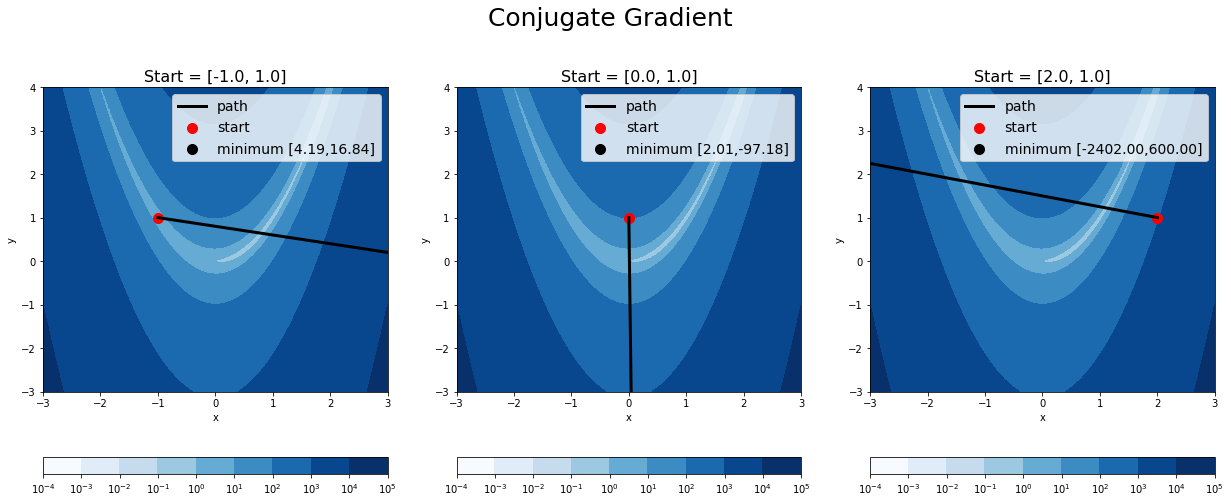

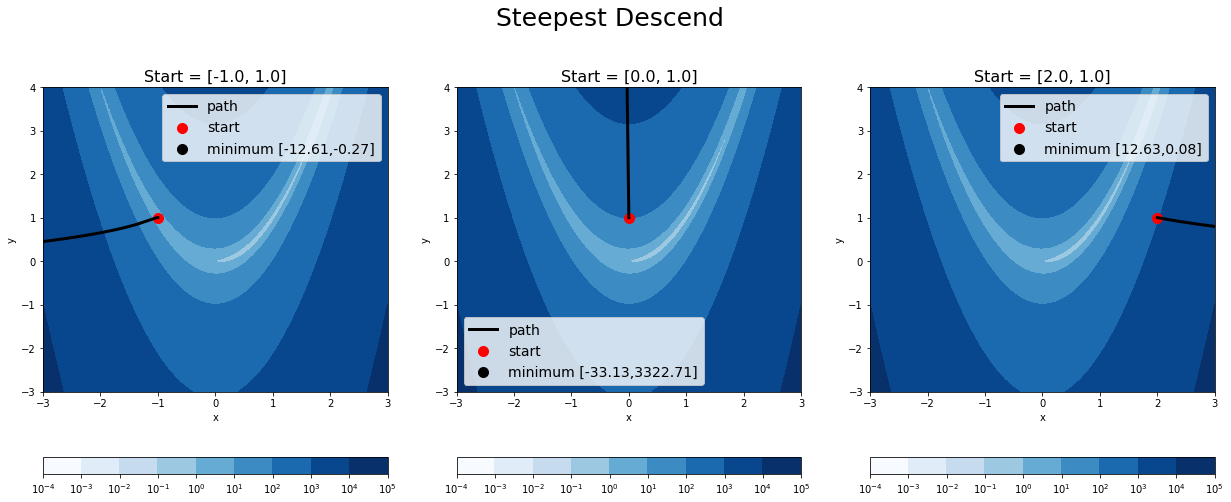

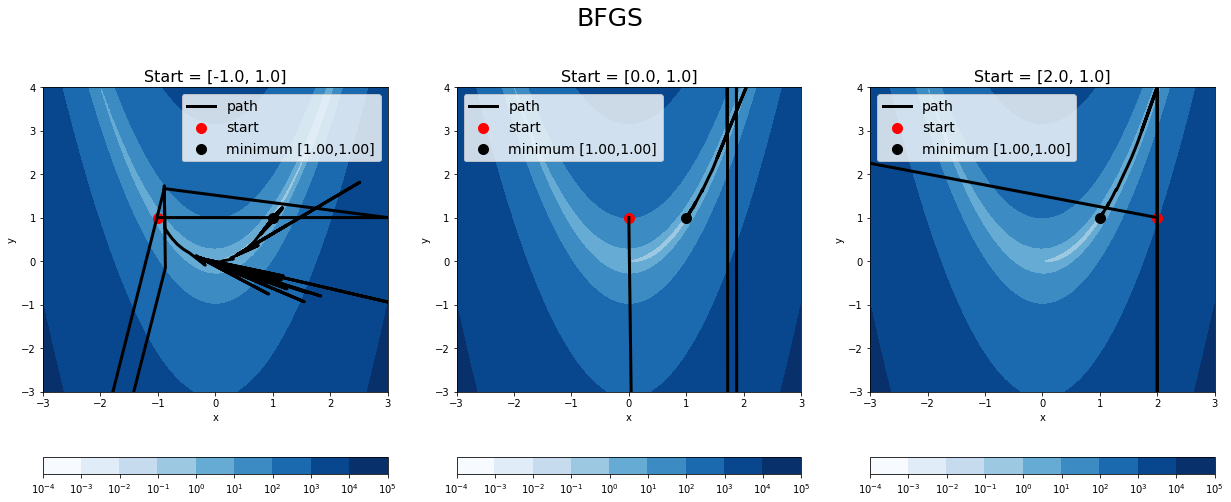

TypeError: list indices must be integers or slices, not tuple

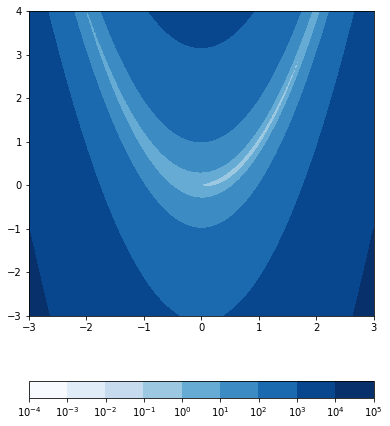

In [23]:
x_grid = np.linspace(-3, 3, 150)
y_grid = np.linspace(-3, 4, 200)
for model in models:
    plot_path(f1, res[model], model, x_grid=x_grid, y_grid=y_grid)
#plot_path(f1, res_GD, "Gradient Descend", x_grid=x_grid, y_grid=y_grid)

In [ ]:
plot_convergency([v[0].time_rec for k,v in res.items()],models)

In [ ]:
plot_acc([v[0].val_rec for k,v in res.items()],[1,1],models)

In [27]:
res_GD=minimize(f1,[1,-1],method="Gradient Descend",max_iter=100000) 

C:\Users\Lenovo\Desktop\cs207_FinalProject\Implementation\../AutoDiff\variables.py:131: RuntimeWarning: overflow encountered in double_scalars
  pow = binary_user_function(lambda x,y: x**y, lambda x,y: y*(x**(y-1)), lambda x,y: x**y*np.log(x))
C:\Users\Lenovo\Desktop\cs207_FinalProject\Implementation\../AutoDiff\variables.py:110: RuntimeWarning: invalid value encountered in double_scalars
  sub = binary_user_function(lambda x,y: x-y, lambda x,y: 1, lambda x,y: -1)


In [28]:
res_GD.val_rec

[array([ 1, -1]),
 array([-7.,  3.]),
 array([1281.16,   95.  ]),
 array([-8.41094711e+09,  3.28264689e+06]),
 array([2.38009722e+30, 1.41488062e+20]),
 array([-5.39316965e+91,  1.13297255e+61]),
 array([6.27468946e+275, 5.81725578e+183]),
 array([-inf,  inf]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan])

In [24]:
res['Gradient Descend'][0].val_rec

[array([-1,  1]),
 array([-0.96,  1.  ]),
 array([-1.221856,  0.8432  ]),
 array([1.9980973 , 2.14266417]),
 array([-12.80561611,   5.84212151]),
 array([8087.87720293,  322.12548643]),
 array([-2.11622333e+12,  1.30827193e+08]),
 array([3.79091881e+37, 8.95680235e+24]),
 array([-2.17918170e+113,  2.87421309e+075]),
 array([            inf, 9.49766573e+226]),
 array([nan, inf]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan]),
 array([nan, nan])